In [12]:
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
nlp = spacy.load("en_core_web_sm")

In [21]:
%run 'data_collection.ipynb'

{'status': 'ok', 'totalResults': 14365, 'articles': [{'source': {'id': None, 'name': 'Ted.com'}, 'author': 'Anathea Chino, contact@ted.com (TED)', 'title': 'The power shift US politics needs | Anathea Chino', 'description': 'As the cofounder of Advance Native Political Leadership, Anathea Chino creates space for Native American leaders to thrive in an often unwelcoming political system. Alongside comedian and filmmaker Negin Farsad, she discusses the power of diverse identities i…', 'url': 'https://www.ted.com/talks/anathea_chino_the_power_shift_us_politics_needs', 'urlToImage': 'https://pi.tedcdn.com/r/talkstar-assets.s3.amazonaws.com/production/talks/talk_145748/bfd7ebaa-a34d-477c-82fe-2338a6cf3500/AnatheaChino_2024N-embed.jpg?u%5Br%5D=2&u%5Bs%5D=0.5&u%5Ba%5D=0.8&u%5Bt%5D=0.03&quality=82c=1050%2C550&w=1050', 'publishedAt': '2025-02-11T15:59:41Z', 'content': 'TED is supported by ads and partners00:00'}, {'source': {'id': 'the-verge', 'name': 'The Verge'}, 'author': 'Verge Press Room',

In [26]:
def preprocess_text_spacy(text):
    if text is not None: 
        doc = nlp(text.lower())  
        filtered_tokens = [token.text for token in doc if not token.is_stop and token.is_alpha]
        return ' '.join(filtered_tokens)
    else:
        return ''  


In [27]:
texts = [article['description'] for article in articles]
processed_texts = [preprocess_text_spacy(text) for text in texts]

In [28]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(processed_texts)

X_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

In [29]:
def extract_features_from_articles(articles):
    texts = [article['description'] for article in articles]
    processed_texts = [preprocess_text_spacy(text) for text in texts]
    vectorizer = TfidfVectorizer()

    X = vectorizer.fit_transform(processed_texts)
    X_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

    return X_df, vectorizer

In [30]:
X_df, vectorizer = extract_features_from_articles(articles)

In [31]:
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X_df)

cluster_labels = kmeans.labels_

for i, article in enumerate(articles):
    article['cluster'] = cluster_labels[i]

In [32]:
for article in articles:
    print(f"Title: {article['title']}, Cluster: {article['cluster']}")

Title: FTC Chair praises Justice Thomas as ‘the most important judge of the last 100 years’ for Black History Month, Cluster: 2
Title: 16 minutes, Cluster: 2
Title: AI Will Save Dating Apps. Or Maybe Finally Kill Them, Cluster: 2
Title: 'Sad day for tennis' - Sinner doping ban 'leaves sour taste', Cluster: 2
Title: ChatGPT’s Political Views Are Shifting Right, a New Analysis Finds, Cluster: 2
Title: iPhone voice recognition controversy: 'Racist' converts to 'Trump', Cluster: 2
Title: Saturday Night Live Played the Wrong Greatest-Hits Reel, Cluster: 2
Title: Why Does Integer Addition Approximate Float Multiplication?, Cluster: 2
Title: Trump Evicts Moon Rock From Oval Office, Returns It to NASA, Cluster: 2
Title: DeepSeek AI draws ire of spy agency over data hoarding and hot bias, Cluster: 2
Title: Here’s How I Ensure That ChatGPT Doesn’t Give Me Biased Answers, Cluster: 2
Title: Google Removes Pledge To Not Use AI For Weapons From Website, Cluster: 2
Title: Internal documents reveal ho

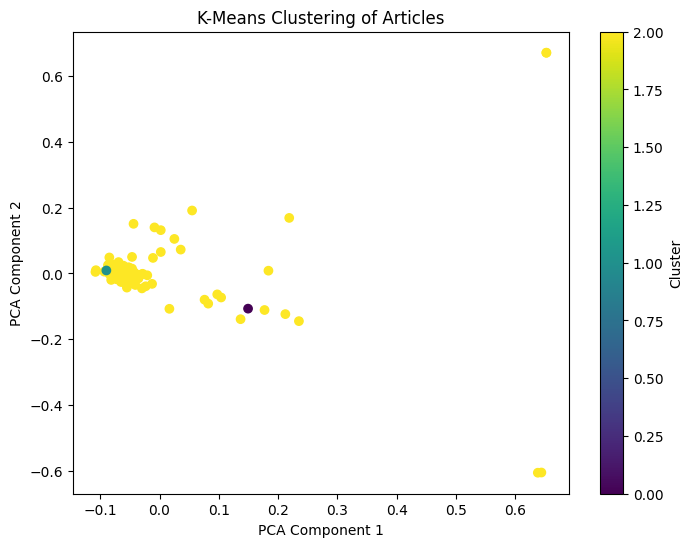

In [33]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_df)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis')
plt.colorbar(label='Cluster')
plt.title("K-Means Clustering of Articles")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()


In [34]:
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=3, random_state=42)
lda.fit(X_df)


topics = lda.components_

n_top_words = 10
feature_names = X_df.columns
for topic_idx, topic in enumerate(topics):
    print(f"Topic #{topic_idx}:")
    print(" ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))


Topic #0:
bias post comments artificial intelligence belong thoughts musk new times
Topic #1:
bias chatgpt research ai data deepseek float wrong new deep
Topic #2:
ai trump court image available apple cats race learn latest
